<a href="https://colab.research.google.com/github/Alamein/ArewaDS-Deep-Learning/blob/main/week_2/week_2_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Arewa Data Science Academy**

### **Deep Learning Cohort1.0**

### **Name: Aminu Hamza Nababa**

### **Email: alaminhnab4@gmail.com**

### **Title: Week 2 Solution**

### **Exercises Solution**

In [2]:
# import working libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

1. Create a straight line dataset using the linear regression formula (weight * X + bias).

In [4]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples: \nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples: 
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [5]:
# divide the data into training and testing
train_split = int(len(X) * 0.8)
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

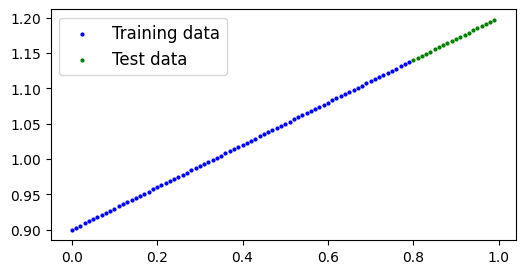

In [9]:
# visualize the training and testing data
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (6,3))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 12})
plot_predictions()

2. Build a PyTorch model by subclassing nn.Module.

In [20]:
# pytorch model by subclassing nn.Module
# Linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(data=torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

    self.bias = nn.Parameter(data=torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

  def forward(self, x):
    return self.weight * x + self.bias

torch.manual_seed(32)
model_1 = LinearRegressionModel()
model_1,model_1.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.8651])), ('bias', tensor([0.0284]))]))

In [21]:
# module 1 parameter
next(model_1.parameters()).device

device(type='cpu')

In [23]:
# model 1 into device
model_1.to(device)
list(model_1.parameters())

[Parameter containing:
 tensor([0.8651], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.0284], device='cuda:0', requires_grad=True)]

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [26]:
# loss funtion and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.03)

In [31]:
# training loop
torch.manual_seed(57)

epochs = 864

# share the data to the device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step() # optimizer

  if epoch % 30 == 0:  # testing function
    model_1.eval()
    with torch.inference_mode():
      y_preds = model_1(X_test)
      test_loss = loss_fn(y_preds,y_test)

      print(f"Epoch: {epoch}, Train loss: {loss:.3f}, Test loss: {test_loss:.3f}")

Epoch: 0, Train loss: 0.023, Test loss: 0.007
Epoch: 30, Train loss: 0.023, Test loss: 0.007
Epoch: 60, Train loss: 0.023, Test loss: 0.007
Epoch: 90, Train loss: 0.023, Test loss: 0.007
Epoch: 120, Train loss: 0.023, Test loss: 0.007
Epoch: 150, Train loss: 0.023, Test loss: 0.007
Epoch: 180, Train loss: 0.023, Test loss: 0.007
Epoch: 210, Train loss: 0.023, Test loss: 0.007
Epoch: 240, Train loss: 0.023, Test loss: 0.007
Epoch: 270, Train loss: 0.023, Test loss: 0.007
Epoch: 300, Train loss: 0.023, Test loss: 0.007
Epoch: 330, Train loss: 0.023, Test loss: 0.007
Epoch: 360, Train loss: 0.023, Test loss: 0.007
Epoch: 390, Train loss: 0.023, Test loss: 0.007
Epoch: 420, Train loss: 0.023, Test loss: 0.007
Epoch: 450, Train loss: 0.023, Test loss: 0.007
Epoch: 480, Train loss: 0.023, Test loss: 0.007
Epoch: 510, Train loss: 0.023, Test loss: 0.007
Epoch: 540, Train loss: 0.023, Test loss: 0.007
Epoch: 570, Train loss: 0.023, Test loss: 0.007
Epoch: 600, Train loss: 0.023, Test loss: 0.0

4. Make predictions with the trained model on the test data.

In [32]:
# testing the train model
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1712],
        [1.1744],
        [1.1776],
        [1.1808],
        [1.1840],
        [1.1872],
        [1.1905],
        [1.1937],
        [1.1969],
        [1.2001],
        [1.2033],
        [1.2065],
        [1.2097],
        [1.2129],
        [1.2162],
        [1.2194],
        [1.2226],
        [1.2258],
        [1.2290],
        [1.2322]], device='cuda:0')

In [33]:
y_preds.cpu()

tensor([[1.1712],
        [1.1744],
        [1.1776],
        [1.1808],
        [1.1840],
        [1.1872],
        [1.1905],
        [1.1937],
        [1.1969],
        [1.2001],
        [1.2033],
        [1.2065],
        [1.2097],
        [1.2129],
        [1.2162],
        [1.2194],
        [1.2226],
        [1.2258],
        [1.2290],
        [1.2322]])

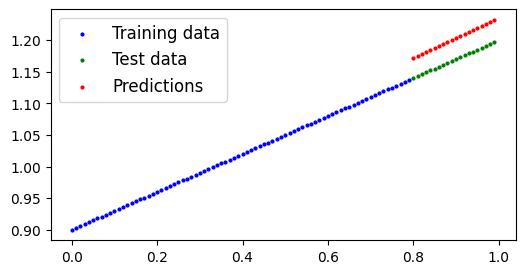

In [34]:
# visualize the prediction
plot_predictions(predictions = y_preds.cpu())

5. Save your trained model's state_dict() to file.

In [35]:
from pathlib import Path

# model folder
mdl_fldr = Path("models") # (Model folder)
mdl_fldr.mkdir(parents = True,exist_ok = True) # (make model directory)
# naming model
mdl_nm = "week_1_ADS_DL_Model" # (Model Name)
mdl_dir = mdl_fldr / mdl_nm
# add model to model directory (mdl_dir)
print(f"Saving model to the model directory {mdl_dir}")
torch.save(obj = model_1.state_dict(),f = mdl_dir)

Saving model to the model directory models/week_1_ADS_DL_Model


In [37]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = mdl_dir))
loaded_model.to(device)

LinearRegressionModel()

In [38]:
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')